# Pandas Exercises Outside of Class

## Exercise description

1. Basic exercise

* I'd like you to pick 3 neighbourhoods with some criteria. For instance, one predominantly upper class, one middle class, one working class. It can also be by race, ethnicity, number of immigrants, etc.
* First step is to select all data from each neighbourhood and store it in a variable For instance, harlem variable will have all the data in df that has neighbourhood == "Harlem"
* I'd like you to calculate the mean price of their ads. But first, you need to select some data:
  * I'd like you to compare only Entire home/apt prices. Don't count private rooms or shared rooms.
  * Also, I'd like you to only count prices in the 30 to 500 range, so we can ignore the most obvious outliers (These numbers are totally random, by the way)
  * Make sure to do those steps one by one, storing them in a variable and checking if they worked
2. A bit more advanced
* We will try to create a single graph involving data from all three neighbourhoods. First thing is to concatenate them all into a single variable. Google pandas concat and try to see how the syntax works.
* Google pandas groupby and see if you can create a bar plot with the mean prices you found above. One bar for each of the neighbourhoods you picked, all in the same graph.
3. Even more advanced
* Go to pandas bar plot doc for bar plot options and to data frame plot doc for general dataframe options and play a bit with your graph options:
* Can you rename the chart title?
* Can you change the label 'neighbourhoods' to 'hoods'? (or anything else that you want)
* Can you change the bar color?
* Can you make the bar horizontal?
* Can you make the price axis go from 30 to 500?
* And whatever else you feel like doing.
4. Saving it as a file
* Once you are done with your graph, it is time to save it.
* Get all the code you used to plot and store it in a variable.
* Use get_fig and save_fig like below:
`plot = # put here all the code you used to plot your graph
fig = plot.get_figure()
fig.savefig('crazy_graph.jpg',dpi=300)`
* Look for the file in your file explorer and open it with your preferred image software
* If the image is cut off, try to add this option `bbox_inches = "tight"` to `savefig` and run it again.
* Post the file on our slack group! (optional, but highly encouraged!)

### Acquire data

First, we'll acquire the Airbnb data using pandas `read_csv` and assign it to a variable `df`.

In [63]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('http://bit.ly/airbnbcsv')

In [3]:
# Inspect just to see that things are copacetic and how headers are spelled ;) 
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Basic exercise

First, we'll want to create three subsets of this data by neighborhood (or neighbourhood). For full transparency, I picked the upper class neighborhood based on [this site](https://www.elikarealestate.com/blog/10-wealthiest-neighborhoods-nyc/); I selected the middle class neighborhod based on my own experience living all over Queens in the last decade, and the lower class neighborhood using [this site](https://www.roadsnacks.net/worst-neighborhoods-in-new-york-city/). Not exactly the most scientific method, but enough to get started on the analysis.

In [4]:
# Upper class
b_heights_bool = df['neighbourhood'] == 'Brooklyn Heights'
brooklyn_heights = df[b_heights_bool]
brooklyn_heights

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
331,82549,Columbia Castle in Brooklyn Heights,448312,Christopher,Brooklyn,Brooklyn Heights,40.69260,-73.99832,Private room,100,3,66,2016-09-16,0.68,2,0
332,82550,Columbia Castle 2 BR,448312,Christopher,Brooklyn,Brooklyn Heights,40.69441,-73.99771,Entire home/apt,200,3,80,2019-06-30,0.85,2,106
387,117425,"Conveniently Located, Sunny Brooklyn Heights!",593115,LuLu,Brooklyn,Brooklyn Heights,40.69263,-73.99438,Entire home/apt,150,30,95,2018-05-26,0.96,1,281
1201,512209,Your own townhouse in Bklyn Heights,2521513,Amy,Brooklyn,Brooklyn Heights,40.69964,-73.99299,Entire home/apt,800,3,60,2019-01-01,0.70,1,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46502,35281731,Brooklyn Heights Oasis,106436589,Wendy,Brooklyn,Brooklyn Heights,40.69852,-73.99606,Entire home/apt,399,14,0,NaN,NaN,2,67
47040,35569456,"2 BR Modern Apt, Extra Lofted Bed, BK Heights",267621090,Shameika,Brooklyn,Brooklyn Heights,40.69934,-73.99635,Entire home/apt,600,3,4,2019-07-06,4.00,1,323
47158,35612199,Designer large studio in Brooklyn Heights,213432040,Naomi,Brooklyn,Brooklyn Heights,40.69924,-73.99296,Entire home/apt,150,2,0,NaN,NaN,1,74
48678,36381795,Lovely one-bedroom;\nBrooklyn Heights,289823,Ben,Brooklyn,Brooklyn Heights,40.69383,-73.99328,Entire home/apt,115,14,0,NaN,NaN,1,17


In [5]:
# Middle class
woodside_bool = df['neighbourhood'] == 'Woodside'
woodside = df[woodside_bool]
woodside

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
77,18198,Little King of Queens,70091,Justin,Queens,Woodside,40.75038,-73.90334,Private room,70,30,25,2019-05-31,0.22,1,324
746,270231,Cozy New York City private room,1366310,Janina,Queens,Woodside,40.74409,-73.91122,Private room,85,2,270,2019-07-07,2.95,2,306
1218,519310,YOU ROOM IN NYC,1366310,Janina,Queens,Woodside,40.74377,-73.91225,Private room,75,2,251,2019-07-07,2.92,2,317
1556,704838,An Oasis in the Big Apple 1,3621183,Paul,Queens,Woodside,40.74723,-73.89706,Entire home/apt,120,3,60,2019-07-04,1.59,3,281
1573,714028,An Oasis in the Big Apple 2,3621183,Paul,Queens,Woodside,40.74746,-73.89712,Entire home/apt,120,3,51,2019-07-03,1.52,3,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47203,35634704,WOODSIDE COMFORTABLE ROOM 15 MINUTES FROM THE ...,266792224,Alex,Queens,Woodside,40.74833,-73.90827,Private room,90,2,1,2019-07-01,1.00,1,365
47404,35716084,Private rooms And Matchless Location,233050530,Suleyman,Queens,Woodside,40.74568,-73.90844,Private room,49,2,0,NaN,NaN,1,177
47712,35876561,Modern house (2 BR Apt) • 30Mins from Time Squ...,76360760,Christopher,Queens,Woodside,40.74400,-73.90185,Entire home/apt,169,1,0,NaN,NaN,1,60
48056,36062221,SHORT TERM STAY,9037589,Rahib,Queens,Woodside,40.74367,-73.91247,Private room,90,1,0,NaN,NaN,1,179


In [6]:
# Lower class
m_haven_bool = df['neighbourhood'] == 'Mott Haven'
mott_haven = df[m_haven_bool]
mott_haven

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1060,444430,comfy room minutes from museums,420542,Danielle,Bronx,Mott Haven,40.81128,-73.92399,Private room,49,1,23,2018-03-27,0.27,1,333
2498,1278784,Private room minutes from midtown!,6959061,Roque,Bronx,Mott Haven,40.81291,-73.90772,Private room,60,2,147,2019-06-24,2.02,1,213
4709,3312276,"Cozy studio/kitchen, bathroom",14214034,Desmar,Bronx,Mott Haven,40.81444,-73.92516,Entire home/apt,75,2,85,2019-06-09,1.41,2,253
4828,3431378,Luxe Tuscan Suite Private Room,17292935,Anne,Bronx,Mott Haven,40.81055,-73.92482,Private room,55,1,231,2019-06-22,3.95,2,16
4897,3507112,"#1 PRIVATE STUDIO IN BX,15MINS NYC.",17658078,Richard,Bronx,Mott Haven,40.81049,-73.90430,Private room,79,2,11,2016-03-19,0.19,1,0
5241,3790118,Metro-luxe Tuscan Suite Private Room,17292935,Anne,Bronx,Mott Haven,40.81050,-73.92507,Private room,55,1,276,2019-06-17,4.63,2,19
5260,3802218,Cozy Private Bedroom,19533769,Chandra,Bronx,Mott Haven,40.80772,-73.91791,Private room,53,1,321,2019-06-12,5.46,1,44
5441,3939086,"Call this Home (for a spell, at least....)",881214,Mysia,Bronx,Mott Haven,40.80866,-73.92069,Private room,45,5,14,2017-08-26,0.28,1,0
9044,6939597,Full garden apartment in Brownstone,2723812,Libertad,Bronx,Mott Haven,40.80993,-73.92613,Entire home/apt,100,2,57,2019-06-23,1.17,2,284
12091,9394188,Room for 1 Female or Couple,38805180,Maria,Bronx,Mott Haven,40.81130,-73.92465,Private room,65,3,2,2019-01-02,0.05,1,356


Our next step in the basic exercise is to find the mean price of the three neighborhoods we selected. However, there are some basic cleaning steps we'll want to take:

1. Filter by Entire homes/apartment prices to exclude private or shared rooms within a residence.
2. Filter out outliers with a simple range of price (30 - 500)

#### Filter for entire homes/apartments

In [7]:
b_heights_entire_bool = brooklyn_heights['room_type'] == 'Entire home/apt'
b_heights_entire_bool

85        True
331      False
332       True
387       True
1201      True
         ...  
46502     True
47040     True
47158     True
48678     True
48740     True
Name: room_type, Length: 154, dtype: bool

In [8]:
brooklyn_heights_entire = brooklyn_heights[b_heights_entire_bool]
brooklyn_heights_entire

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
332,82550,Columbia Castle 2 BR,448312,Christopher,Brooklyn,Brooklyn Heights,40.69441,-73.99771,Entire home/apt,200,3,80,2019-06-30,0.85,2,106
387,117425,"Conveniently Located, Sunny Brooklyn Heights!",593115,LuLu,Brooklyn,Brooklyn Heights,40.69263,-73.99438,Entire home/apt,150,30,95,2018-05-26,0.96,1,281
1201,512209,Your own townhouse in Bklyn Heights,2521513,Amy,Brooklyn,Brooklyn Heights,40.69964,-73.99299,Entire home/apt,800,3,60,2019-01-01,0.70,1,67
1272,546504,Brooklyn Heights 1brm Private Deck,2687009,Jeff,Brooklyn,Brooklyn Heights,40.69271,-73.99365,Entire home/apt,135,4,5,2016-05-16,0.06,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46502,35281731,Brooklyn Heights Oasis,106436589,Wendy,Brooklyn,Brooklyn Heights,40.69852,-73.99606,Entire home/apt,399,14,0,NaN,NaN,2,67
47040,35569456,"2 BR Modern Apt, Extra Lofted Bed, BK Heights",267621090,Shameika,Brooklyn,Brooklyn Heights,40.69934,-73.99635,Entire home/apt,600,3,4,2019-07-06,4.00,1,323
47158,35612199,Designer large studio in Brooklyn Heights,213432040,Naomi,Brooklyn,Brooklyn Heights,40.69924,-73.99296,Entire home/apt,150,2,0,NaN,NaN,1,74
48678,36381795,Lovely one-bedroom;\nBrooklyn Heights,289823,Ben,Brooklyn,Brooklyn Heights,40.69383,-73.99328,Entire home/apt,115,14,0,NaN,NaN,1,17


In [9]:
woodside_entire_bool = woodside['room_type'] == 'Entire home/apt'
woodside_entire_bool

77       False
746      False
1218     False
1556      True
1573      True
         ...  
47203    False
47404    False
47712     True
48056    False
48431    False
Name: room_type, Length: 235, dtype: bool

In [10]:
woodside_entire = woodside[woodside_entire_bool]
woodside_entire

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1556,704838,An Oasis in the Big Apple 1,3621183,Paul,Queens,Woodside,40.74723,-73.89706,Entire home/apt,120,3,60,2019-07-04,1.59,3,281
1573,714028,An Oasis in the Big Apple 2,3621183,Paul,Queens,Woodside,40.74746,-73.89712,Entire home/apt,120,3,51,2019-07-03,1.52,3,253
1574,714049,An Oasis in the Big Apple 3,3621183,Paul,Queens,Woodside,40.74687,-73.89892,Entire home/apt,120,3,55,2019-06-04,0.67,3,289
4723,3325617,LEGAL studio in Queens,16790098,Shawn & Christine,Queens,Woodside,40.74549,-73.90872,Entire home/apt,105,2,216,2019-06-18,3.54,1,70
5497,3975630,Beautiful 1 bedroom in NYC,20604091,Eliana E,Queens,Woodside,40.74433,-73.91172,Entire home/apt,150,2,110,2019-06-27,1.86,1,294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45787,34949120,Modern house (2 BR Apt) • 30 Mins from Time Sq...,259013161,Jisoo,Queens,Woodside,40.74302,-73.90287,Entire home/apt,150,1,3,2019-06-15,1.91,2,155
45843,34975527,3bdrm 1fl home w/parking!Close to ManhattanAir...,261028352,Young,Queens,Woodside,40.74305,-73.90070,Entire home/apt,169,2,0,NaN,NaN,2,91
45849,34976241,Cozy Apartment perfect for NYC vacation,254119216,Zeyna,Queens,Woodside,40.74479,-73.91193,Entire home/apt,108,2,2,2019-06-23,2.00,1,5
45940,35005367,"Beautiful 3 bedroom close to Times Square, NYC",263721494,Tasmia,Queens,Woodside,40.74357,-73.90894,Entire home/apt,189,1,2,2019-07-05,2.00,1,212


In [11]:
m_haven_entire_bool = mott_haven['room_type'] == 'Entire home/apt'
m_haven_entire_bool

1060     False
2498     False
4709      True
4828     False
4897     False
5241     False
5260     False
5441     False
9044      True
12091    False
12966    False
15111    False
15175     True
19369     True
19445     True
21126     True
22276    False
22277    False
22348    False
23750    False
24414     True
25115    False
26362     True
26526     True
27066     True
27404    False
27723    False
28593     True
29328     True
29655     True
31014    False
31573     True
32886     True
34381     True
35402     True
35434    False
35609    False
35724    False
36510    False
36524    False
36529    False
36535     True
37463    False
37562    False
37567    False
37802    False
40135    False
40175     True
40865     True
41348     True
41978    False
42346    False
42391    False
44117     True
44535     True
44589     True
44632     True
45439     True
46466    False
48805     True
Name: room_type, dtype: bool

In [12]:
mott_haven_entire = mott_haven[m_haven_entire_bool]
mott_haven_entire

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4709,3312276,"Cozy studio/kitchen, bathroom",14214034,Desmar,Bronx,Mott Haven,40.81444,-73.92516,Entire home/apt,75,2,85,2019-06-09,1.41,2,253
9044,6939597,Full garden apartment in Brownstone,2723812,Libertad,Bronx,Mott Haven,40.80993,-73.92613,Entire home/apt,100,2,57,2019-06-23,1.17,2,284
15175,12114017,SoBro Guest House,64976141,Fran & Jason,Bronx,Mott Haven,40.80903,-73.92143,Entire home/apt,125,3,142,2019-06-25,3.59,1,185
19369,15453985,Sunny Apartment Close to NYC's Major Attractions,99139601,Rosalia,Bronx,Mott Haven,40.81201,-73.90823,Entire home/apt,100,2,170,2019-06-25,5.16,1,83
19445,15510279,Studio in Mott Haven-1 subway stop from Manhattan,99651727,Lucia,Bronx,Mott Haven,40.81072,-73.92349,Entire home/apt,120,2,26,2019-06-19,0.85,1,260
21126,16764130,Spacious Studio apt—1 Subway stop from Manhattan,41578662,Lucia,Bronx,Mott Haven,40.81150,-73.92580,Entire home/apt,80,7,0,NaN,NaN,2,0
24414,19659874,Big Private Studio one Subway stop from Manhattan,41578662,Lucia,Bronx,Mott Haven,40.81133,-73.92356,Entire home/apt,100,5,13,2019-04-06,0.58,2,14
26362,21000540,Creative Artist Apartment in SoBro,128490590,Jermaine,Bronx,Mott Haven,40.81553,-73.92453,Entire home/apt,120,2,0,NaN,NaN,1,0
26526,21110331,Cherry Hill,141012332,Jeremiah,Bronx,Mott Haven,40.80762,-73.92454,Entire home/apt,115,2,100,2019-06-23,4.76,1,130
27066,21413889,A Garden Suite - Mott Haven Townhouse Studio,155171571,Tania,Bronx,Mott Haven,40.80889,-73.92028,Entire home/apt,125,3,32,2019-06-08,1.59,1,6


#### Filter for range to remove outliers

In this next section, we'll filter each neighborhood's listings for a price range between 30 - 500. This simple method removes outliers in the data.

In [40]:
# Tried to use the range_condition in funcs to dry up the code, but it only returned on boolean value
# Wouldn't mind some help figuring out the function to write

b_heights_outliers_bool = (brooklyn_heights_entire['price'] >= 30) & (brooklyn_heights_entire['price'] <= 500)

In [38]:
b_heights_outliers_bool

85       False
332       True
387       True
1201     False
1272      True
         ...  
46502     True
47040    False
47158     True
48678     True
48740    False
Name: price, Length: 126, dtype: bool

In [39]:
brooklyn_heights_basic = brooklyn_heights_entire[b_heights_outliers_bool]
brooklyn_heights_basic

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
332,82550,Columbia Castle 2 BR,448312,Christopher,Brooklyn,Brooklyn Heights,40.69441,-73.99771,Entire home/apt,200,3,80,2019-06-30,0.85,2,106
387,117425,"Conveniently Located, Sunny Brooklyn Heights!",593115,LuLu,Brooklyn,Brooklyn Heights,40.69263,-73.99438,Entire home/apt,150,30,95,2018-05-26,0.96,1,281
1272,546504,Brooklyn Heights 1brm Private Deck,2687009,Jeff,Brooklyn,Brooklyn Heights,40.69271,-73.99365,Entire home/apt,135,4,5,2016-05-16,0.06,1,0
1346,591710,Spacious one bedroom apartment in Brooklyn Hei...,2920855,Theodore,Brooklyn,Brooklyn Heights,40.69464,-73.99885,Entire home/apt,175,10,8,2018-08-24,0.17,1,0
1359,596448,The Perfect Brooklyn Heights Apt,2648088,Angela,Brooklyn,Brooklyn Heights,40.69082,-73.99281,Entire home/apt,129,1,109,2019-06-14,1.51,1,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45622,34865230,Cool studio in Brooklyn Heights,3415882,Matthew,Brooklyn,Brooklyn Heights,40.69015,-73.99271,Entire home/apt,150,5,2,2019-07-03,2.00,1,10
46084,35065083,Best views in the city is here,3398621,Nikita,Brooklyn,Brooklyn Heights,40.69664,-73.99467,Entire home/apt,140,2,1,2019-06-10,1.00,1,0
46502,35281731,Brooklyn Heights Oasis,106436589,Wendy,Brooklyn,Brooklyn Heights,40.69852,-73.99606,Entire home/apt,399,14,0,NaN,NaN,2,67
47158,35612199,Designer large studio in Brooklyn Heights,213432040,Naomi,Brooklyn,Brooklyn Heights,40.69924,-73.99296,Entire home/apt,150,2,0,NaN,NaN,1,74


In [42]:
woodside_outliers_bool = (woodside_entire['price'] >= 30) & (woodside_entire['price'] <= 500)
woodside_outliers_bool

1556     True
1573     True
1574     True
4723     True
5497     True
         ... 
45787    True
45843    True
45849    True
45940    True
47712    True
Name: price, Length: 63, dtype: bool

In [43]:
woodside_basic = woodside_entire[woodside_outliers_bool]
woodside_basic

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1556,704838,An Oasis in the Big Apple 1,3621183,Paul,Queens,Woodside,40.74723,-73.89706,Entire home/apt,120,3,60,2019-07-04,1.59,3,281
1573,714028,An Oasis in the Big Apple 2,3621183,Paul,Queens,Woodside,40.74746,-73.89712,Entire home/apt,120,3,51,2019-07-03,1.52,3,253
1574,714049,An Oasis in the Big Apple 3,3621183,Paul,Queens,Woodside,40.74687,-73.89892,Entire home/apt,120,3,55,2019-06-04,0.67,3,289
4723,3325617,LEGAL studio in Queens,16790098,Shawn & Christine,Queens,Woodside,40.74549,-73.90872,Entire home/apt,105,2,216,2019-06-18,3.54,1,70
5497,3975630,Beautiful 1 bedroom in NYC,20604091,Eliana E,Queens,Woodside,40.74433,-73.91172,Entire home/apt,150,2,110,2019-06-27,1.86,1,294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45787,34949120,Modern house (2 BR Apt) • 30 Mins from Time Sq...,259013161,Jisoo,Queens,Woodside,40.74302,-73.90287,Entire home/apt,150,1,3,2019-06-15,1.91,2,155
45843,34975527,3bdrm 1fl home w/parking!Close to ManhattanAir...,261028352,Young,Queens,Woodside,40.74305,-73.90070,Entire home/apt,169,2,0,NaN,NaN,2,91
45849,34976241,Cozy Apartment perfect for NYC vacation,254119216,Zeyna,Queens,Woodside,40.74479,-73.91193,Entire home/apt,108,2,2,2019-06-23,2.00,1,5
45940,35005367,"Beautiful 3 bedroom close to Times Square, NYC",263721494,Tasmia,Queens,Woodside,40.74357,-73.90894,Entire home/apt,189,1,2,2019-07-05,2.00,1,212


Interesting that this range filtered out zero records from woodside_entire (63 rows).

In [45]:
m_haven_outliers_bool = (mott_haven_entire['price'] >= 30) & (mott_haven_entire['price'] <= 500)
m_haven_outliers_bool

4709     True
9044     True
15175    True
19369    True
19445    True
21126    True
24414    True
26362    True
26526    True
27066    True
28593    True
29328    True
29655    True
31573    True
32886    True
34381    True
35402    True
36535    True
40175    True
40865    True
41348    True
44117    True
44535    True
44589    True
44632    True
45439    True
48805    True
Name: price, dtype: bool

In [46]:
mott_haven_basic = mott_haven_entire[m_haven_outliers_bool]
mott_haven_basic

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4709,3312276,"Cozy studio/kitchen, bathroom",14214034,Desmar,Bronx,Mott Haven,40.81444,-73.92516,Entire home/apt,75,2,85,2019-06-09,1.41,2,253
9044,6939597,Full garden apartment in Brownstone,2723812,Libertad,Bronx,Mott Haven,40.80993,-73.92613,Entire home/apt,100,2,57,2019-06-23,1.17,2,284
15175,12114017,SoBro Guest House,64976141,Fran & Jason,Bronx,Mott Haven,40.80903,-73.92143,Entire home/apt,125,3,142,2019-06-25,3.59,1,185
19369,15453985,Sunny Apartment Close to NYC's Major Attractions,99139601,Rosalia,Bronx,Mott Haven,40.81201,-73.90823,Entire home/apt,100,2,170,2019-06-25,5.16,1,83
19445,15510279,Studio in Mott Haven-1 subway stop from Manhattan,99651727,Lucia,Bronx,Mott Haven,40.81072,-73.92349,Entire home/apt,120,2,26,2019-06-19,0.85,1,260
21126,16764130,Spacious Studio apt—1 Subway stop from Manhattan,41578662,Lucia,Bronx,Mott Haven,40.81150,-73.92580,Entire home/apt,80,7,0,NaN,NaN,2,0
24414,19659874,Big Private Studio one Subway stop from Manhattan,41578662,Lucia,Bronx,Mott Haven,40.81133,-73.92356,Entire home/apt,100,5,13,2019-04-06,0.58,2,14
26362,21000540,Creative Artist Apartment in SoBro,128490590,Jermaine,Bronx,Mott Haven,40.81553,-73.92453,Entire home/apt,120,2,0,NaN,NaN,1,0
26526,21110331,Cherry Hill,141012332,Jeremiah,Bronx,Mott Haven,40.80762,-73.92454,Entire home/apt,115,2,100,2019-06-23,4.76,1,130
27066,21413889,A Garden Suite - Mott Haven Townhouse Studio,155171571,Tania,Bronx,Mott Haven,40.80889,-73.92028,Entire home/apt,125,3,32,2019-06-08,1.59,1,6


#### The mean price per neighborhood

In [53]:
brooklyn_heights_mean_price = round(brooklyn_heights_basic.price.mean(), 2)
woodside_heights_mean_price = round(woodside_basic.price.mean(), 2)
mott_haven_mean_price = round(mott_haven_basic.price.mean(), 2)

In [55]:
print(
    f"The mean price for entire home/apartment listings in Brooklyn Heights is ${brooklyn_heights_mean_price}.\n"
    f"The mean price for entire home/apartment listings in Woodside is ${woodside_heights_mean_price}.\n"
    f"The mean price for entire home/apartment listings in Mott Haven is ${mott_haven_mean_price}."
)

The mean price for entire home/apartment listings in Brooklyn Heights is $176.47.
The mean price for entire home/apartment listings in Woodside is $148.71.
The mean price for entire home/apartment listings in Mott Haven is $110.0.


### A bit more advanced exercise

Next, we'll see if we can't display a bar graph showing the mean price for each of our three neighborhoods. We'll do this by:

1. Concatinating the three neighborhood dataframes into one dataframe
2. Using `groupby` to create a barchart with the mean price for each neighborhood

In [58]:
all_three_neighborhoods = pd.concat(
    [brooklyn_heights_basic, woodside_basic, mott_haven_basic], 
    ignore_index=True)

In [59]:
all_three_neighborhoods

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,82550,Columbia Castle 2 BR,448312,Christopher,Brooklyn,Brooklyn Heights,40.69441,-73.99771,Entire home/apt,200,3,80,2019-06-30,0.85,2,106
1,117425,"Conveniently Located, Sunny Brooklyn Heights!",593115,LuLu,Brooklyn,Brooklyn Heights,40.69263,-73.99438,Entire home/apt,150,30,95,2018-05-26,0.96,1,281
2,546504,Brooklyn Heights 1brm Private Deck,2687009,Jeff,Brooklyn,Brooklyn Heights,40.69271,-73.99365,Entire home/apt,135,4,5,2016-05-16,0.06,1,0
3,591710,Spacious one bedroom apartment in Brooklyn Hei...,2920855,Theodore,Brooklyn,Brooklyn Heights,40.69464,-73.99885,Entire home/apt,175,10,8,2018-08-24,0.17,1,0
4,596448,The Perfect Brooklyn Heights Apt,2648088,Angela,Brooklyn,Brooklyn Heights,40.69082,-73.99281,Entire home/apt,129,1,109,2019-06-14,1.51,1,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,34284597,South Bronx Suite,19903807,Carol,Bronx,Mott Haven,40.81305,-73.91655,Entire home/apt,120,3,5,2019-06-02,2.50,3,45
202,34313928,South Bronx Suite Two,19903807,Carol,Bronx,Mott Haven,40.81245,-73.91648,Entire home/apt,120,3,1,2019-06-15,1.00,3,45
203,34334035,South Bronx Gathering Place,19903807,Carol,Bronx,Mott Haven,40.81132,-73.91715,Entire home/apt,145,3,1,2019-05-23,0.64,3,48
204,34749210,Sobro,262047205,Adriana,Bronx,Mott Haven,40.80689,-73.91437,Entire home/apt,100,3,4,2019-07-01,2.79,1,330


In [61]:
group_neighborhood = all_three_neighborhoods.groupby('neighbourhood')

In [65]:
group_nei_mean = group_neighborhood['price'].agg([np.mean])

In [66]:
group_nei_mean

,mean
neighbourhood,
Brooklyn Heights,176.465517
Mott Haven,110.000000
Woodside,148.714286


<AxesSubplot:xlabel='neighbourhood'>

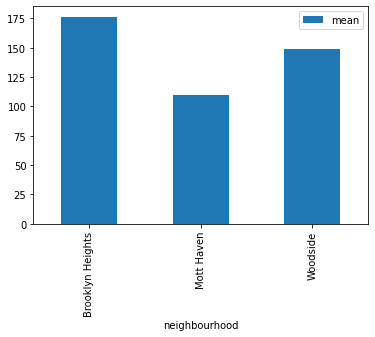

In [67]:
group_nei_mean.plot.bar()